In [1]:
import CellNode as c 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

"\nplt.figure(figsize=(20,10))\n\nplt.violinplot(dataset=bernEst, positions=locBern, widths=0.05, showmedians=True, showextrema=False)\nplt.xticks(locBern)\nplt.grid()\nplt.tight_layout()\nplt.savefig('death_events.png')\n"

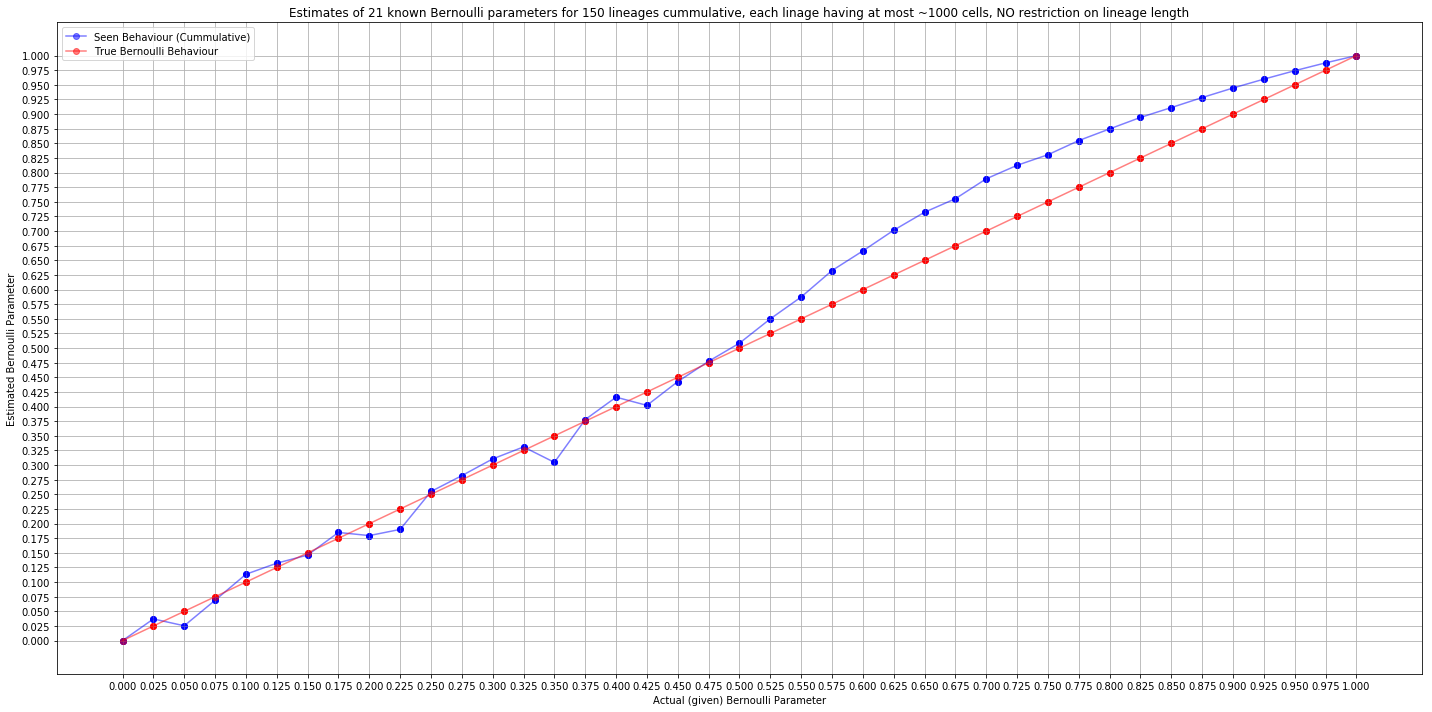

In [2]:
exampleLineage = c.Tree()
exampleLineage.tree = []

locBern = np.linspace(0,1,41)
bernEst = []
estimator_holder = []
for param in locBern:
    mle_param_holder = []
    for i in range(150):
        exampleLineage.tree = []
        exampleLineage.tree = c.generate(numCells=1000, locBern=param, cGom=1000)
        #if param > 0:
        #    while len(exampleLineage.tree) < 2:
        #        exampleLineage.tree = c.generate(numCells=1000, locBern=param, cGom=10000000)
        for cell in exampleLineage.tree:
            mle_param_holder.append(cell.fate*1)
    bernEst.append(mle_param_holder)
    estimator_holder.append((sum(mle_param_holder)/len(mle_param_holder)))
bernEst = np.array(bernEst)

plt.figure(figsize=(20,10))
plt.plot(locBern, estimator_holder, 'b-o', label="Seen Behaviour (Cummulative)", alpha=0.5)
plt.plot(locBern, locBern, 'r-o', label="True Bernoulli Behaviour", alpha=0.5)
plt.scatter(locBern, locBern, c='r')
plt.scatter(locBern, estimator_holder, c='b')
#plt.violinplot(dataset=bernEst.T, positions=locBern, widths=0.05, showmedians=True, showextrema=False)
plt.xticks(locBern)
plt.yticks(locBern)
plt.xlabel('Actual (given) Bernoulli Parameter')
plt.ylabel('Estimated Bernoulli Parameter')
plt.legend()
plt.title('Estimates of 21 known Bernoulli parameters for 150 lineages cummulative, each linage having at most ~1000 cells, NO restriction on lineage length')
plt.grid()
plt.tight_layout()
plt.savefig('bern.png')

'''
plt.figure(figsize=(20,10))

plt.violinplot(dataset=bernEst, positions=locBern, widths=0.05, showmedians=True, showextrema=False)
plt.xticks(locBern)
plt.grid()
plt.tight_layout()
plt.savefig('death_events.png')
'''
#exampleLineage.plotTree()

In [3]:
fate_holder = []
for cell in exampleLineage.tree:
    fate_holder.append(cell.fate)

In [4]:
print(sum(fate_holder)/len(fate_holder))

1.0


#### 